In [2]:
import numpy as np
import statistics
import sys
import matplotlib.pyplot as plt
import csv

In [4]:

results = {}

# Grab data and put into dictionary
with open('network.csv') as f:
    csv_reader = csv.reader(f, delimiter=',')
    for row in csv_reader:
        if (row[0] not in results):
            results[row[0]] = {}
        if (row[1] not in results[row[0]]):
            results[row[0]][row[1]] = []
                
        results[row[0]][row[1]].append(float(row[2]))


In [5]:

# Calculate mean throughput for each
def throughput(data, size):
    # print("size:" + str(int(size)/1000000) + " time:" + str(data))
    # return 8*int(size)/(data *1000000) # GB/s
    # print("size:" + str(size) + " time:" + str(data))
    return 8*int(size)/(data) # Mb/s

averages = {}
for platform in results:
    if (platform not in averages):
        averages[platform] = {}

    for size in results[platform]:
        averages[platform][size] = throughput(statistics.mean(results[platform][size]), size)

# Sort keys inorder of size
def sort_keys(mydict):
        mylist = []

        keylist = sorted(mydict.keys(), key=int)
        for key in keylist:
                mylist.append(mydict[key])
        return mylist

for platform in averages:
        averages[platform] = sort_keys(averages[platform])


print(averages)
# exit(1)

{'bare': [310.96944725180754, 307.48694189438476, 298.33484925971675, 292.98780314848284], 'runc': [336.84210526315786, 293.2873849763537, 292.54949571780674, 289.52358893440845], 'runsc_ptrace': [263.3311389071758, 230.40811036548484, 269.2152375824472, 279.7564719911317], 'runsc_kvm': [245.77572964669739, 209.48440650449083, 251.06388320508154, 213.99185760981794], 'kata': [287.76978417266184, 283.1056691910255, 288.7148579883792, 290.25259231846513]}


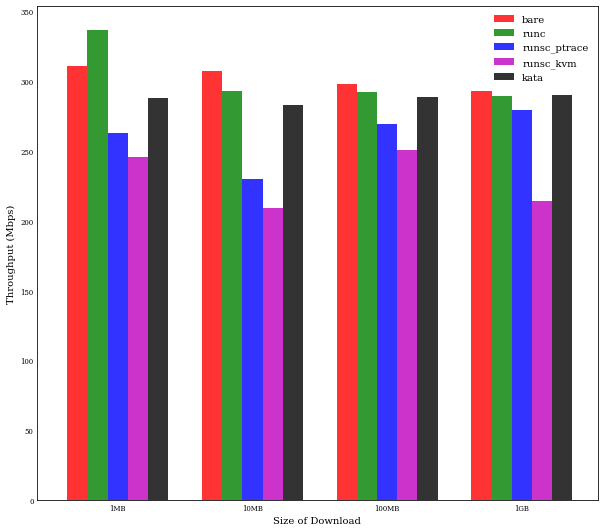

In [21]:

if (True):
    plt.rc('font', family='serif')
    plt.rc('xtick', labelsize='x-small')
    plt.rc('ytick', labelsize='x-small')
#     fig = plt.figure(figsize=(3.5, 2.5))
    fig = plt.figure(figsize=(8.5, 7.5))
    ax = fig.add_subplot(1, 1, 1)
    n_groups = 4

    # create plot
    index = np.arange(n_groups)
    bar_width = 0.15
    opacity = 0.8
    
    rects1 = plt.bar(index + 0*bar_width, averages['bare'], bar_width,
    alpha=opacity,
#     color='0.1',
    color='r',
    label='bare')

    rects2 = plt.bar(index + 1*bar_width, averages['runc'], bar_width,
    alpha=opacity,
    color='g',
    label='runc')
    
    rects3 = plt.bar(index +  2*bar_width, averages['runsc_ptrace'], bar_width,
    alpha=opacity,
    color='b',
    label='runsc_ptrace')
    
    rects3 = plt.bar(index + 3*bar_width, averages['runsc_kvm'], bar_width,
    alpha=opacity,
    color='m',
    label='runsc_kvm')

    rects4 = plt.bar(index + 4*bar_width, averages['kata'], bar_width,
    alpha=opacity,
    color='k',
    label='kata')

    plt.xlabel('Size of Download', fontsize=10)
    plt.ylabel('Throughput (Mbps)', fontsize=10)
    plt.xticks(index + 2*bar_width, ("1MB", "10MB", "100MB", "1GB"))
    plt.xlim(left=-2*bar_width)
    plt.legend(loc = 'upper right')
    plt.legend(loc = 'upper right', frameon=False, prop={'size':10})
    ax.tick_params(axis=u'both', which=u'both',length=0)     
    plt.tight_layout()
    plt.savefig('./network_throughput.png', format='png', dpi=1000)
plt.show()
